In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from tensorflow.keras.datasets import mnist

In [62]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
image = x_train[0]

In [ ]:
# gray scale 0 to 255

In [65]:
image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

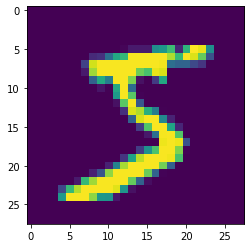

In [66]:
plt.imshow(image)

In [67]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# see above when we give this data to network , 
#when they process it will turn to continus value as output . 
#But we want it as catagorical, So we are deling here with Clasification problem 

In [11]:
# here we need to use One hot encode this 

In [68]:
from tensorflow.keras.utils  import to_categorical

In [22]:
y_train.shape

(60000,)

In [69]:
y_Example = to_categorical(y_train)

In [70]:
y_Example.shape

(60000, 10)

In [25]:
# see above one hardered ecoded 

In [71]:
y_Example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
#it alredy converted to 5 in binery encoded 

In [72]:
y_cat_test = to_categorical(y_test, num_classes= 10)

In [29]:
#Some time number categories is missing in set , So it better to put number class with above method argument 

In [73]:
y_cat_train = to_categorical(y_train, 10)

In [31]:
#Normalise data 

In [74]:
x_train = x_train / 255

In [75]:
y_test = x_test / 255

In [34]:
# reshape the data 

In [76]:
# Batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [77]:
x_train.shape

(60000, 28, 28, 1)

In [78]:
x_test.shape

(10000, 28, 28)

In [79]:
# Batch_size, width, height, color_channels
x_test = x_test.reshape(10000, 28, 28, 1)

In [80]:
from tensorflow.keras.models import Sequential

In [81]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [89]:
model = Sequential()
#filter if verity of imges more number of filter and and it power 2 most of the time  
#kernel_size  2x2 or 4x4
# strides -(x,y)how big strides we are moving 1x1 or 2x2 etc  
model.add(Conv2D(filters= 32, kernel_size=(4,4), input_shape= (28,28,1),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
#output Layer, Softmax -> Muticlass problem 

model.add(Dense (10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [ 'accuracy'])

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor = 'val_loss',patience= 1)

In [93]:
model.fit (x_train, y_cat_train,epochs= 10, validation_data= (x_test, y_cat_test))#, callbacks= [ early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 643us/sample - loss: 0.1322 - acc: 0.9603 - val_loss: 8.7285 - val_acc: 0.9814
Epoch 2/10
60000/60000 [==============================] - 38s 634us/sample - loss: 0.0463 - acc: 0.9855 - val_loss: 21.7381 - val_acc: 0.9669
Epoch 3/10
60000/60000 [==============================] - 38s 636us/sample - loss: 0.0299 - acc: 0.9909 - val_loss: 16.3981 - val_acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 39s 649us/sample - loss: 0.0215 - acc: 0.9930 - val_loss: 22.7644 - val_acc: 0.9715
Epoch 5/10
60000/60000 [==============================] - 38s 631us/sample - loss: 0.0148 - acc: 0.9956 - val_loss: 27.1392 - val_acc: 0.9688
Epoch 6/10
60000/60000 [==============================] - 39s 643us/sample - loss: 0.0109 - acc: 0.9965 - val_loss: 24.3193 - val_acc: 0.9737
Epoch 7/10
60000/60000 [==============================] - 38s 638us/sample - loss: 0.0086 - acc: 0.

In [94]:
# rember keep track of accurecy 
metrics = pd.DataFrame(model.history.history)

In [95]:
metrics

,loss,acc,val_loss,val_acc
0,0.132200,0.960350,8.728500,0.9814
1,0.046297,0.985450,21.738139,0.9669
2,0.029902,0.990867,16.398096,0.9767
3,0.021487,0.993033,22.764393,0.9715
4,0.014783,0.995600,27.139231,0.9688
5,0.010878,0.996500,24.319326,0.9737
6,0.008601,0.997183,29.769586,0.9740
7,0.007404,0.997433,36.173029,0.9701
8,0.005558,0.998083,31.184618,0.9741
9,0.003813,0.998833,69.387098,0.9540


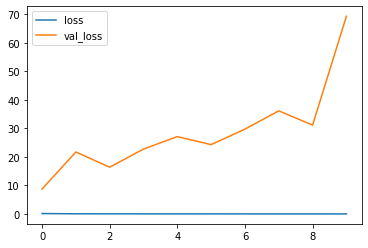

In [96]:
metrics[['loss', 'val_loss']].plot()

In [97]:
metrics[['accuracy', 'val_accuracy']].plot()

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [98]:
my_number = x_test[0]

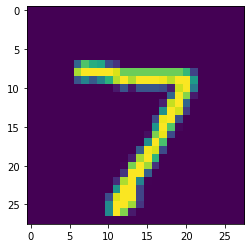

In [99]:
plt.imshow(my_number.reshape(28,28))

In [100]:
#num_image, width, height, color_channel
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])

In [131]:
from PIL import Image
image = Image.open('image.jpg')
image=image.convert('L') #makes it greyscale
image1 =np.asarray(image.getdata(),dtype=np.float64).reshape((28, 28))


In [133]:

image1

array([[254., 254., 253., 255., 255., 254., 255., 255., 253., 255., 254.,
        255., 254., 254., 255., 254., 255., 255., 255., 255., 254., 255.,
        254., 255., 255., 255., 255., 255.],
       [255., 253., 255., 253., 253., 255., 253., 253., 255., 253., 251.,
        254., 254., 255., 255., 255., 255., 252., 254., 253., 255., 252.,
        255., 249., 255., 255., 255., 255.],
       [253., 254., 254., 254., 255., 255., 248., 255., 249., 255., 255.,
        255., 255., 255., 255., 248., 251., 255., 255., 255., 252., 254.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 252., 255., 249., 251., 255., 253., 255., 241., 229.,
        230., 249., 246., 247., 255., 255., 250., 255., 251., 255., 253.,
        255., 252., 255., 255., 255., 255.],
       [254., 255., 254., 251., 255., 255., 233., 185., 123.,  50.,   2.,
          0.,  73.,  97., 109., 153., 208., 251., 255., 251., 252., 251.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255

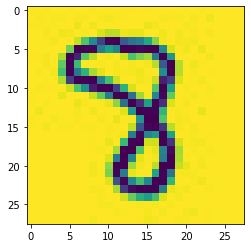

In [134]:
plt.imshow(image1)

In [135]:
model.predict_classes(image1.reshape(1,28,28,1))


array([8])